In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import nibabel as nib # supports a collection of neuroimaging file formats
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

import seaborn as sns
sns.set_style('ticks')

In [2]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, sli in enumerate(slices):
        axes[i].imshow(sli.T, cmap="gray", origin="lower")

In [3]:
sub_04_filename = os.path.join(os.getcwd(), "ds003688-download", "sub-04", "ses-mri3t", "func",\
                               "sub-04_ses-mri3t_task-film_run-1_bold.nii.gz")
sub_04 = nib.load(sub_04_filename)
sub_04_data = sub_04.get_fdata()
sub_04_data.shape

(40, 64, 64, 641)

In [4]:
slice_0 = sub_04_data[20, :, :, 100]
slice_1 = sub_04_data[:, 32, :, 100]
slice_2 = sub_04_data[:, :, 32, 100]

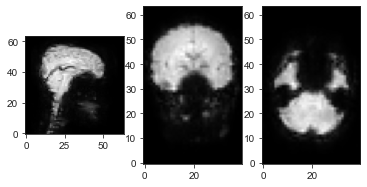

In [5]:
show_slices([slice_0, slice_1, slice_2])

In [6]:
sub_04_data_normalized = (sub_04_data - sub_04_data.min()) / (sub_04_data.max() - sub_04_data.min())
sub_04_data_reversed = 1 - sub_04_data_normalized

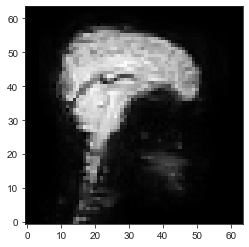

In [8]:
plt.imshow(sub_04_data_normalized[20, :, :, 100].T, cmap="gray", origin="lower")

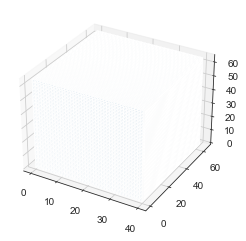

In [9]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(sub_04_data_reversed[:, :, :, 0], facecolors='#1f77b430');

In [10]:
def explore_3d_image(layer):
    plt.figure(figsize=(10, 15))
    plt.imshow(sub_04_data[:, :, layer, 100], cmap="gray")
    plt.title("Explore layers of brain fMRI", family="Arial", fontsize=20)
    plt.axis('off')
    return layer

In [11]:
interact(explore_3d_image, layer=(0, sub_04_data.shape[2] - 1))

interactive(children=(IntSlider(value=31, description='layer', max=63), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3d_image(layer)>

In [28]:
import torch

In [29]:
img_orig = torch.from_numpy(np.asanyarray(nib.load(sub_04_filename).dataobj)).to(dtype=torch.float32)

In [14]:
background = img_orig == 0

In [15]:
img_temp = (img_orig - img_orig[~background].mean()) / (img_orig[~background].std())

In [16]:
img = torch.empty(img_orig.shape)

In [17]:
img[background] = img_temp.min()
img[~background] = img_temp[~background]

In [18]:
interact(explore_3d_image, layer=(0, img.shape[2] - 1))

interactive(children=(IntSlider(value=31, description='layer', max=63), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3d_image(layer)>

In [22]:
import cv2
import IPython.display as ipd

import subprocess

In [23]:
video_file = os.path.join(os.getcwd(), "Film stimulus.mp4")

In [24]:
# Load in video capture
videocap = cv2.VideoCapture(video_file)

In [25]:
height = videocap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = videocap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f"Height: {height}, Width: {width}")

Height: 480.0, Width: 640.0


In [26]:
fps = videocap.get(cv2.CAP_PROP_FPS)
print(f"FPS: {fps}")

FPS: 25.002564365575957


In [27]:
# success: true/ false; true denotes that an image has been loaded
# image: the actual image data if success = true; if success = false, image is NULL
success, frame = videocap.read()
count = 1
while success:
    cv2.imwrite(os.path.join(os.getcwd(), "frames", f"frame_{count}.jpg"), frame)    
    success, frame = videocap.read()
    print("Saved frame", count)
    count += 1

Saved frame 1
Saved frame 2
Saved frame 3
Saved frame 4
Saved frame 5
Saved frame 6
Saved frame 7
Saved frame 8
Saved frame 9
Saved frame 10
Saved frame 11
Saved frame 12
Saved frame 13
Saved frame 14
Saved frame 15
Saved frame 16
Saved frame 17
Saved frame 18
Saved frame 19
Saved frame 20
Saved frame 21
Saved frame 22
Saved frame 23
Saved frame 24
Saved frame 25
Saved frame 26
Saved frame 27
Saved frame 28
Saved frame 29
Saved frame 30
Saved frame 31
Saved frame 32
Saved frame 33
Saved frame 34
Saved frame 35
Saved frame 36
Saved frame 37
Saved frame 38
Saved frame 39
Saved frame 40
Saved frame 41
Saved frame 42
Saved frame 43
Saved frame 44
Saved frame 45
Saved frame 46
Saved frame 47
Saved frame 48
Saved frame 49
Saved frame 50
Saved frame 51
Saved frame 52
Saved frame 53
Saved frame 54
Saved frame 55
Saved frame 56
Saved frame 57
Saved frame 58
Saved frame 59
Saved frame 60
Saved frame 61
Saved frame 62
Saved frame 63
Saved frame 64
Saved frame 65
Saved frame 66
Saved frame 67
Save

Saved frame 520
Saved frame 521
Saved frame 522
Saved frame 523
Saved frame 524
Saved frame 525
Saved frame 526
Saved frame 527
Saved frame 528
Saved frame 529
Saved frame 530
Saved frame 531
Saved frame 532
Saved frame 533
Saved frame 534
Saved frame 535
Saved frame 536
Saved frame 537
Saved frame 538
Saved frame 539
Saved frame 540
Saved frame 541
Saved frame 542
Saved frame 543
Saved frame 544
Saved frame 545
Saved frame 546
Saved frame 547
Saved frame 548
Saved frame 549
Saved frame 550
Saved frame 551
Saved frame 552
Saved frame 553
Saved frame 554
Saved frame 555
Saved frame 556
Saved frame 557
Saved frame 558
Saved frame 559
Saved frame 560
Saved frame 561
Saved frame 562
Saved frame 563
Saved frame 564
Saved frame 565
Saved frame 566
Saved frame 567
Saved frame 568
Saved frame 569
Saved frame 570
Saved frame 571
Saved frame 572
Saved frame 573
Saved frame 574
Saved frame 575
Saved frame 576
Saved frame 577
Saved frame 578
Saved frame 579
Saved frame 580
Saved frame 581
Saved fr

Saved frame 1038
Saved frame 1039
Saved frame 1040
Saved frame 1041
Saved frame 1042
Saved frame 1043
Saved frame 1044
Saved frame 1045
Saved frame 1046
Saved frame 1047
Saved frame 1048
Saved frame 1049
Saved frame 1050
Saved frame 1051
Saved frame 1052
Saved frame 1053
Saved frame 1054
Saved frame 1055
Saved frame 1056
Saved frame 1057
Saved frame 1058
Saved frame 1059
Saved frame 1060
Saved frame 1061
Saved frame 1062
Saved frame 1063
Saved frame 1064
Saved frame 1065
Saved frame 1066
Saved frame 1067
Saved frame 1068
Saved frame 1069
Saved frame 1070
Saved frame 1071
Saved frame 1072
Saved frame 1073
Saved frame 1074
Saved frame 1075
Saved frame 1076
Saved frame 1077
Saved frame 1078
Saved frame 1079
Saved frame 1080
Saved frame 1081
Saved frame 1082
Saved frame 1083
Saved frame 1084
Saved frame 1085
Saved frame 1086
Saved frame 1087
Saved frame 1088
Saved frame 1089
Saved frame 1090
Saved frame 1091
Saved frame 1092
Saved frame 1093
Saved frame 1094
Saved frame 1095
Saved frame 10

Saved frame 1678
Saved frame 1679
Saved frame 1680
Saved frame 1681
Saved frame 1682
Saved frame 1683
Saved frame 1684
Saved frame 1685
Saved frame 1686
Saved frame 1687
Saved frame 1688
Saved frame 1689
Saved frame 1690
Saved frame 1691
Saved frame 1692
Saved frame 1693
Saved frame 1694
Saved frame 1695
Saved frame 1696
Saved frame 1697
Saved frame 1698
Saved frame 1699
Saved frame 1700
Saved frame 1701
Saved frame 1702
Saved frame 1703
Saved frame 1704
Saved frame 1705
Saved frame 1706
Saved frame 1707
Saved frame 1708
Saved frame 1709
Saved frame 1710
Saved frame 1711
Saved frame 1712
Saved frame 1713
Saved frame 1714
Saved frame 1715
Saved frame 1716
Saved frame 1717
Saved frame 1718
Saved frame 1719
Saved frame 1720
Saved frame 1721
Saved frame 1722
Saved frame 1723
Saved frame 1724
Saved frame 1725
Saved frame 1726
Saved frame 1727
Saved frame 1728
Saved frame 1729
Saved frame 1730
Saved frame 1731
Saved frame 1732
Saved frame 1733
Saved frame 1734
Saved frame 1735
Saved frame 17

Saved frame 2215
Saved frame 2216
Saved frame 2217
Saved frame 2218
Saved frame 2219
Saved frame 2220
Saved frame 2221
Saved frame 2222
Saved frame 2223
Saved frame 2224
Saved frame 2225
Saved frame 2226
Saved frame 2227
Saved frame 2228
Saved frame 2229
Saved frame 2230
Saved frame 2231
Saved frame 2232
Saved frame 2233
Saved frame 2234
Saved frame 2235
Saved frame 2236
Saved frame 2237
Saved frame 2238
Saved frame 2239
Saved frame 2240
Saved frame 2241
Saved frame 2242
Saved frame 2243
Saved frame 2244
Saved frame 2245
Saved frame 2246
Saved frame 2247
Saved frame 2248
Saved frame 2249
Saved frame 2250
Saved frame 2251
Saved frame 2252
Saved frame 2253
Saved frame 2254
Saved frame 2255
Saved frame 2256
Saved frame 2257
Saved frame 2258
Saved frame 2259
Saved frame 2260
Saved frame 2261
Saved frame 2262
Saved frame 2263
Saved frame 2264
Saved frame 2265
Saved frame 2266
Saved frame 2267
Saved frame 2268
Saved frame 2269
Saved frame 2270
Saved frame 2271
Saved frame 2272
Saved frame 22

Saved frame 2751
Saved frame 2752
Saved frame 2753
Saved frame 2754
Saved frame 2755
Saved frame 2756
Saved frame 2757
Saved frame 2758
Saved frame 2759
Saved frame 2760
Saved frame 2761
Saved frame 2762
Saved frame 2763
Saved frame 2764
Saved frame 2765
Saved frame 2766
Saved frame 2767
Saved frame 2768
Saved frame 2769
Saved frame 2770
Saved frame 2771
Saved frame 2772
Saved frame 2773
Saved frame 2774
Saved frame 2775
Saved frame 2776
Saved frame 2777
Saved frame 2778
Saved frame 2779
Saved frame 2780
Saved frame 2781
Saved frame 2782
Saved frame 2783
Saved frame 2784
Saved frame 2785
Saved frame 2786
Saved frame 2787
Saved frame 2788
Saved frame 2789
Saved frame 2790
Saved frame 2791
Saved frame 2792
Saved frame 2793
Saved frame 2794
Saved frame 2795
Saved frame 2796
Saved frame 2797
Saved frame 2798
Saved frame 2799
Saved frame 2800
Saved frame 2801
Saved frame 2802
Saved frame 2803
Saved frame 2804
Saved frame 2805
Saved frame 2806
Saved frame 2807
Saved frame 2808
Saved frame 28

Saved frame 3265
Saved frame 3266
Saved frame 3267
Saved frame 3268
Saved frame 3269
Saved frame 3270
Saved frame 3271
Saved frame 3272
Saved frame 3273
Saved frame 3274
Saved frame 3275
Saved frame 3276
Saved frame 3277
Saved frame 3278
Saved frame 3279
Saved frame 3280
Saved frame 3281
Saved frame 3282
Saved frame 3283
Saved frame 3284
Saved frame 3285
Saved frame 3286
Saved frame 3287
Saved frame 3288
Saved frame 3289
Saved frame 3290
Saved frame 3291
Saved frame 3292
Saved frame 3293
Saved frame 3294
Saved frame 3295
Saved frame 3296
Saved frame 3297
Saved frame 3298
Saved frame 3299
Saved frame 3300
Saved frame 3301
Saved frame 3302
Saved frame 3303
Saved frame 3304
Saved frame 3305
Saved frame 3306
Saved frame 3307
Saved frame 3308
Saved frame 3309
Saved frame 3310
Saved frame 3311
Saved frame 3312
Saved frame 3313
Saved frame 3314
Saved frame 3315
Saved frame 3316
Saved frame 3317
Saved frame 3318
Saved frame 3319
Saved frame 3320
Saved frame 3321
Saved frame 3322
Saved frame 33

Saved frame 3809
Saved frame 3810
Saved frame 3811
Saved frame 3812
Saved frame 3813
Saved frame 3814
Saved frame 3815
Saved frame 3816
Saved frame 3817
Saved frame 3818
Saved frame 3819
Saved frame 3820
Saved frame 3821
Saved frame 3822
Saved frame 3823
Saved frame 3824
Saved frame 3825
Saved frame 3826
Saved frame 3827
Saved frame 3828
Saved frame 3829
Saved frame 3830
Saved frame 3831
Saved frame 3832
Saved frame 3833
Saved frame 3834
Saved frame 3835
Saved frame 3836
Saved frame 3837
Saved frame 3838
Saved frame 3839
Saved frame 3840
Saved frame 3841
Saved frame 3842
Saved frame 3843
Saved frame 3844
Saved frame 3845
Saved frame 3846
Saved frame 3847
Saved frame 3848
Saved frame 3849
Saved frame 3850
Saved frame 3851
Saved frame 3852
Saved frame 3853
Saved frame 3854
Saved frame 3855
Saved frame 3856
Saved frame 3857
Saved frame 3858
Saved frame 3859
Saved frame 3860
Saved frame 3861
Saved frame 3862
Saved frame 3863
Saved frame 3864
Saved frame 3865
Saved frame 3866
Saved frame 38

Saved frame 4469
Saved frame 4470
Saved frame 4471
Saved frame 4472
Saved frame 4473
Saved frame 4474
Saved frame 4475
Saved frame 4476
Saved frame 4477
Saved frame 4478
Saved frame 4479
Saved frame 4480
Saved frame 4481
Saved frame 4482
Saved frame 4483
Saved frame 4484
Saved frame 4485
Saved frame 4486
Saved frame 4487
Saved frame 4488
Saved frame 4489
Saved frame 4490
Saved frame 4491
Saved frame 4492
Saved frame 4493
Saved frame 4494
Saved frame 4495
Saved frame 4496
Saved frame 4497
Saved frame 4498
Saved frame 4499
Saved frame 4500
Saved frame 4501
Saved frame 4502
Saved frame 4503
Saved frame 4504
Saved frame 4505
Saved frame 4506
Saved frame 4507
Saved frame 4508
Saved frame 4509
Saved frame 4510
Saved frame 4511
Saved frame 4512
Saved frame 4513
Saved frame 4514
Saved frame 4515
Saved frame 4516
Saved frame 4517
Saved frame 4518
Saved frame 4519
Saved frame 4520
Saved frame 4521
Saved frame 4522
Saved frame 4523
Saved frame 4524
Saved frame 4525
Saved frame 4526
Saved frame 45

Saved frame 5009
Saved frame 5010
Saved frame 5011
Saved frame 5012
Saved frame 5013
Saved frame 5014
Saved frame 5015
Saved frame 5016
Saved frame 5017
Saved frame 5018
Saved frame 5019
Saved frame 5020
Saved frame 5021
Saved frame 5022
Saved frame 5023
Saved frame 5024
Saved frame 5025
Saved frame 5026
Saved frame 5027
Saved frame 5028
Saved frame 5029
Saved frame 5030
Saved frame 5031
Saved frame 5032
Saved frame 5033
Saved frame 5034
Saved frame 5035
Saved frame 5036
Saved frame 5037
Saved frame 5038
Saved frame 5039
Saved frame 5040
Saved frame 5041
Saved frame 5042
Saved frame 5043
Saved frame 5044
Saved frame 5045
Saved frame 5046
Saved frame 5047
Saved frame 5048
Saved frame 5049
Saved frame 5050
Saved frame 5051
Saved frame 5052
Saved frame 5053
Saved frame 5054
Saved frame 5055
Saved frame 5056
Saved frame 5057
Saved frame 5058
Saved frame 5059
Saved frame 5060
Saved frame 5061
Saved frame 5062
Saved frame 5063
Saved frame 5064
Saved frame 5065
Saved frame 5066
Saved frame 50

Saved frame 5549
Saved frame 5550
Saved frame 5551
Saved frame 5552
Saved frame 5553
Saved frame 5554
Saved frame 5555
Saved frame 5556
Saved frame 5557
Saved frame 5558
Saved frame 5559
Saved frame 5560
Saved frame 5561
Saved frame 5562
Saved frame 5563
Saved frame 5564
Saved frame 5565
Saved frame 5566
Saved frame 5567
Saved frame 5568
Saved frame 5569
Saved frame 5570
Saved frame 5571
Saved frame 5572
Saved frame 5573
Saved frame 5574
Saved frame 5575
Saved frame 5576
Saved frame 5577
Saved frame 5578
Saved frame 5579
Saved frame 5580
Saved frame 5581
Saved frame 5582
Saved frame 5583
Saved frame 5584
Saved frame 5585
Saved frame 5586
Saved frame 5587
Saved frame 5588
Saved frame 5589
Saved frame 5590
Saved frame 5591
Saved frame 5592
Saved frame 5593
Saved frame 5594
Saved frame 5595
Saved frame 5596
Saved frame 5597
Saved frame 5598
Saved frame 5599
Saved frame 5600
Saved frame 5601
Saved frame 5602
Saved frame 5603
Saved frame 5604
Saved frame 5605
Saved frame 5606
Saved frame 56

Saved frame 6072
Saved frame 6073
Saved frame 6074
Saved frame 6075
Saved frame 6076
Saved frame 6077
Saved frame 6078
Saved frame 6079
Saved frame 6080
Saved frame 6081
Saved frame 6082
Saved frame 6083
Saved frame 6084
Saved frame 6085
Saved frame 6086
Saved frame 6087
Saved frame 6088
Saved frame 6089
Saved frame 6090
Saved frame 6091
Saved frame 6092
Saved frame 6093
Saved frame 6094
Saved frame 6095
Saved frame 6096
Saved frame 6097
Saved frame 6098
Saved frame 6099
Saved frame 6100
Saved frame 6101
Saved frame 6102
Saved frame 6103
Saved frame 6104
Saved frame 6105
Saved frame 6106
Saved frame 6107
Saved frame 6108
Saved frame 6109
Saved frame 6110
Saved frame 6111
Saved frame 6112
Saved frame 6113
Saved frame 6114
Saved frame 6115
Saved frame 6116
Saved frame 6117
Saved frame 6118
Saved frame 6119
Saved frame 6120
Saved frame 6121
Saved frame 6122
Saved frame 6123
Saved frame 6124
Saved frame 6125
Saved frame 6126
Saved frame 6127
Saved frame 6128
Saved frame 6129
Saved frame 61

Saved frame 6597
Saved frame 6598
Saved frame 6599
Saved frame 6600
Saved frame 6601
Saved frame 6602
Saved frame 6603
Saved frame 6604
Saved frame 6605
Saved frame 6606
Saved frame 6607
Saved frame 6608
Saved frame 6609
Saved frame 6610
Saved frame 6611
Saved frame 6612
Saved frame 6613
Saved frame 6614
Saved frame 6615
Saved frame 6616
Saved frame 6617
Saved frame 6618
Saved frame 6619
Saved frame 6620
Saved frame 6621
Saved frame 6622
Saved frame 6623
Saved frame 6624
Saved frame 6625
Saved frame 6626
Saved frame 6627
Saved frame 6628
Saved frame 6629
Saved frame 6630
Saved frame 6631
Saved frame 6632
Saved frame 6633
Saved frame 6634
Saved frame 6635
Saved frame 6636
Saved frame 6637
Saved frame 6638
Saved frame 6639
Saved frame 6640
Saved frame 6641
Saved frame 6642
Saved frame 6643
Saved frame 6644
Saved frame 6645
Saved frame 6646
Saved frame 6647
Saved frame 6648
Saved frame 6649
Saved frame 6650
Saved frame 6651
Saved frame 6652
Saved frame 6653
Saved frame 6654
Saved frame 66

Saved frame 7089
Saved frame 7090
Saved frame 7091
Saved frame 7092
Saved frame 7093
Saved frame 7094
Saved frame 7095
Saved frame 7096
Saved frame 7097
Saved frame 7098
Saved frame 7099
Saved frame 7100
Saved frame 7101
Saved frame 7102
Saved frame 7103
Saved frame 7104
Saved frame 7105
Saved frame 7106
Saved frame 7107
Saved frame 7108
Saved frame 7109
Saved frame 7110
Saved frame 7111
Saved frame 7112
Saved frame 7113
Saved frame 7114
Saved frame 7115
Saved frame 7116
Saved frame 7117
Saved frame 7118
Saved frame 7119
Saved frame 7120
Saved frame 7121
Saved frame 7122
Saved frame 7123
Saved frame 7124
Saved frame 7125
Saved frame 7126
Saved frame 7127
Saved frame 7128
Saved frame 7129
Saved frame 7130
Saved frame 7131
Saved frame 7132
Saved frame 7133
Saved frame 7134
Saved frame 7135
Saved frame 7136
Saved frame 7137
Saved frame 7138
Saved frame 7139
Saved frame 7140
Saved frame 7141
Saved frame 7142
Saved frame 7143
Saved frame 7144
Saved frame 7145
Saved frame 7146
Saved frame 71

Saved frame 7595
Saved frame 7596
Saved frame 7597
Saved frame 7598
Saved frame 7599
Saved frame 7600
Saved frame 7601
Saved frame 7602
Saved frame 7603
Saved frame 7604
Saved frame 7605
Saved frame 7606
Saved frame 7607
Saved frame 7608
Saved frame 7609
Saved frame 7610
Saved frame 7611
Saved frame 7612
Saved frame 7613
Saved frame 7614
Saved frame 7615
Saved frame 7616
Saved frame 7617
Saved frame 7618
Saved frame 7619
Saved frame 7620
Saved frame 7621
Saved frame 7622
Saved frame 7623
Saved frame 7624
Saved frame 7625
Saved frame 7626
Saved frame 7627
Saved frame 7628
Saved frame 7629
Saved frame 7630
Saved frame 7631
Saved frame 7632
Saved frame 7633
Saved frame 7634
Saved frame 7635
Saved frame 7636
Saved frame 7637
Saved frame 7638
Saved frame 7639
Saved frame 7640
Saved frame 7641
Saved frame 7642
Saved frame 7643
Saved frame 7644
Saved frame 7645
Saved frame 7646
Saved frame 7647
Saved frame 7648
Saved frame 7649
Saved frame 7650
Saved frame 7651
Saved frame 7652
Saved frame 76

Saved frame 8218
Saved frame 8219
Saved frame 8220
Saved frame 8221
Saved frame 8222
Saved frame 8223
Saved frame 8224
Saved frame 8225
Saved frame 8226
Saved frame 8227
Saved frame 8228
Saved frame 8229
Saved frame 8230
Saved frame 8231
Saved frame 8232
Saved frame 8233
Saved frame 8234
Saved frame 8235
Saved frame 8236
Saved frame 8237
Saved frame 8238
Saved frame 8239
Saved frame 8240
Saved frame 8241
Saved frame 8242
Saved frame 8243
Saved frame 8244
Saved frame 8245
Saved frame 8246
Saved frame 8247
Saved frame 8248
Saved frame 8249
Saved frame 8250
Saved frame 8251
Saved frame 8252
Saved frame 8253
Saved frame 8254
Saved frame 8255
Saved frame 8256
Saved frame 8257
Saved frame 8258
Saved frame 8259
Saved frame 8260
Saved frame 8261
Saved frame 8262
Saved frame 8263
Saved frame 8264
Saved frame 8265
Saved frame 8266
Saved frame 8267
Saved frame 8268
Saved frame 8269
Saved frame 8270
Saved frame 8271
Saved frame 8272
Saved frame 8273
Saved frame 8274
Saved frame 8275
Saved frame 82

Saved frame 8771
Saved frame 8772
Saved frame 8773
Saved frame 8774
Saved frame 8775
Saved frame 8776
Saved frame 8777
Saved frame 8778
Saved frame 8779
Saved frame 8780
Saved frame 8781
Saved frame 8782
Saved frame 8783
Saved frame 8784
Saved frame 8785
Saved frame 8786
Saved frame 8787
Saved frame 8788
Saved frame 8789
Saved frame 8790
Saved frame 8791
Saved frame 8792
Saved frame 8793
Saved frame 8794
Saved frame 8795
Saved frame 8796
Saved frame 8797
Saved frame 8798
Saved frame 8799
Saved frame 8800
Saved frame 8801
Saved frame 8802
Saved frame 8803
Saved frame 8804
Saved frame 8805
Saved frame 8806
Saved frame 8807
Saved frame 8808
Saved frame 8809
Saved frame 8810
Saved frame 8811
Saved frame 8812
Saved frame 8813
Saved frame 8814
Saved frame 8815
Saved frame 8816
Saved frame 8817
Saved frame 8818
Saved frame 8819
Saved frame 8820
Saved frame 8821
Saved frame 8822
Saved frame 8823
Saved frame 8824
Saved frame 8825
Saved frame 8826
Saved frame 8827
Saved frame 8828
Saved frame 88

Saved frame 9326
Saved frame 9327
Saved frame 9328
Saved frame 9329
Saved frame 9330
Saved frame 9331
Saved frame 9332
Saved frame 9333
Saved frame 9334
Saved frame 9335
Saved frame 9336
Saved frame 9337
Saved frame 9338
Saved frame 9339
Saved frame 9340
Saved frame 9341
Saved frame 9342
Saved frame 9343
Saved frame 9344
Saved frame 9345
Saved frame 9346
Saved frame 9347
Saved frame 9348
Saved frame 9349
Saved frame 9350
Saved frame 9351
Saved frame 9352
Saved frame 9353
Saved frame 9354
Saved frame 9355
Saved frame 9356
Saved frame 9357
Saved frame 9358
Saved frame 9359
Saved frame 9360
Saved frame 9361
Saved frame 9362
Saved frame 9363
Saved frame 9364
Saved frame 9365
Saved frame 9366
Saved frame 9367
Saved frame 9368
Saved frame 9369
Saved frame 9370
Saved frame 9371
Saved frame 9372
Saved frame 9373
Saved frame 9374
Saved frame 9375
Saved frame 9376
Saved frame 9377
Saved frame 9378
Saved frame 9379
Saved frame 9380
Saved frame 9381
Saved frame 9382
Saved frame 9383
Saved frame 93

In [13]:
import cv2
import torchvision.transforms as transforms

In [14]:
frame_path = os.path.join(os.getcwd(), "frames", "frame_1.jpg")

# Read the image
frame = cv2.imread(frame_path)
  
# Convert BGR image to RGB image
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  
# Define a transform to convert
# the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])
  
# Convert the image to Torch tensor
tensor = transform(frame)
  
# print the converted image tensor
print(tensor)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
plt.imshow(frame)